# EDA on International Airlines to and from Australia

## Source of data:
\
For the below EDA, data is gathered from:\
https://data.gov.au/dataset/ds-dga-e82787e4-a480-4189-b963-1d0b6088103e/details \
Details of the data are referred from:\
https://data.gov.au/data/dataset/e82787e4-a480-4189-b963-1d0b6088103e/resource/1804bf27-7ed4-4b72-84d9-314c6a7ebd2b/download/notes.txt \
Dataset: International Airlines- Operated Flights and Seats\
Created by: Bureau of Infrastructure and Transport Research Economics (BITRE)\
Created on: 05/06/2016\
Updated on: 02/21/2022

## Loading Data:

In [1]:
#importing pandas and loading data into a dataframe
import pandas as pd
df = pd.read_csv('data.csv')

In [2]:
#first 5 lines of the dataframe
df.head()

,Month,In_Out,Australian_City,International_City,Airline,Route,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num
0,Sep-03,I,Adelaide,Denpasar,Garuda Indonesia,DPS-ADL-MEL,Indonesia,SE Asia,Indonesia,SE Asia,0,13,3809,2003,9
1,Sep-03,I,Adelaide,Hong Kong,Cathay Pacific Airways,HKG-ADL-MEL,Hong Kong (SAR),NE Asia,Hong Kong (SAR),NE Asia,0,8,2008,2003,9
2,Sep-03,I,Adelaide,Kuala Lumpur,Malaysia Airlines,KUL-ADL,Malaysia,SE Asia,Malaysia,SE Asia,0,17,4726,2003,9
3,Sep-03,I,Adelaide,Singapore,Qantas Airways,SIN-DRW-ADL-MEL,Singapore,SE Asia,Singapore,SE Asia,1,4,908,2003,9
4,Sep-03,I,Adelaide,Singapore,Qantas Airways,SIN-DRW-ADL-SYD,Singapore,SE Asia,Singapore,SE Asia,1,9,2038,2003,9


In [3]:
#Count of rows and columns in the dataframe
df.shape

(107238, 15)

In [4]:
#Checking datatypes of the columns, memory usage and any NaN values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107238 entries, 0 to 107237
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Month               107238 non-null  object
 1   In_Out              107238 non-null  object
 2   Australian_City     107238 non-null  object
 3   International_City  107238 non-null  object
 4   Airline             107238 non-null  object
 5   Route               107238 non-null  object
 6   Port_Country        107238 non-null  object
 7   Port_Region         107238 non-null  object
 8   Service_Country     107238 non-null  object
 9   Service_Region      107238 non-null  object
 10  Stops               107238 non-null  int64 
 11  All_Flights         107238 non-null  int64 
 12  Max_Seats           107238 non-null  int64 
 13  Year                107238 non-null  int64 
 14  Month_num           107238 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 12.3+ MB


## Cleaning Data:

Data inconsistency:\
The origninal data contains **107238 rows** and **15 columns**\
Since we have data from September, 2003 we will use the 2021 year's data, hence shortening the height of the dataframe\
We are deleting a column named **'Route'** as we are not interested in the route details of the flight in our EDA.\
These operations will bring down the memory usage of dataframe by almost three times from **12.3MB to 222KB**.


In [5]:
#Creating a new df, 'df_1' for the transformed data
#Dropping unused columns in the EDA
df_1 = df.drop(['Route'], axis=1)

In [6]:
#Count of rows and columns in df_1
df_1.shape

(107238, 14)

In [7]:
#identifying unique years
unique_years = df_1.Year.unique()
unique_years

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [8]:
#considering data for the years >= 2015
filteredyears = df_1['Year'] == 2021
df_1 = df_1[filteredyears]
df_1.shape

(1895, 14)

In [9]:
#Checking memory usage of the dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, 105343 to 107237
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month               1895 non-null   object
 1   In_Out              1895 non-null   object
 2   Australian_City     1895 non-null   object
 3   International_City  1895 non-null   object
 4   Airline             1895 non-null   object
 5   Port_Country        1895 non-null   object
 6   Port_Region         1895 non-null   object
 7   Service_Country     1895 non-null   object
 8   Service_Region      1895 non-null   object
 9   Stops               1895 non-null   int64 
 10  All_Flights         1895 non-null   int64 
 11  Max_Seats           1895 non-null   int64 
 12  Year                1895 non-null   int64 
 13  Month_num           1895 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 222.1+ KB


In [10]:
#first 5 lines of the dataframe
df_1.head()

,Month,In_Out,Australian_City,International_City,Airline,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num
105343,Jan-21,I,Adelaide,Doha,Qatar Airways,Qatar,Middle East,Qatar,Middle East,0,15,4245,2021,1
105344,Jan-21,I,Adelaide,Doha,Qatar Airways,Qatar,Middle East,Qatar,Middle East,1,1,283,2021,1
105345,Jan-21,I,Adelaide,Kuala Lumpur,Malaysia Airlines,Malaysia,SE Asia,Malaysia,SE Asia,0,2,580,2021,1
105346,Jan-21,I,Adelaide,Los Angeles,Qatar Airways,USA,N America,Qatar,Middle East,0,1,283,2021,1
105347,Jan-21,I,Adelaide,Singapore,Singapore Airlines,Singapore,SE Asia,Singapore,SE Asia,0,13,3939,2021,1


In [11]:
#resetting index for df_1
df_1=df_1.reset_index()

In [12]:
#viewing statistical details of the dataframe
df_1.describe(include='all')

,index,Month,In_Out,Australian_City,International_City,Airline,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num
count,1895.000000,1895,1895,1895,1895,1895,1895,1895,1895,1895,1895.000000,1895.000000,1895.000000,1895.0,1895.000000
unique,NaN,12,2,12,44,43,28,9,28,9,NaN,NaN,NaN,NaN,NaN
top,NaN,Dec-21,I,Sydney,Singapore,Air New Zealand,New Zealand,SE Asia,New Zealand,SE Asia,NaN,NaN,NaN,NaN,NaN
freq,NaN,201,960,833,200,189,336,507,333,507,NaN,NaN,NaN,NaN,NaN
mean,106290.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039050,13.648021,3863.859103,2021.0,6.551451
std,547.183699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.193765,14.338277,4374.936821,0.0,3.427537
min,105343.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,128.000000,2021.0,1.000000
25%,105816.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4.000000,850.500000,2021.0,4.000000
50%,106290.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,9.000000,2320.000000,2021.0,6.000000
75%,106763.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,19.000000,5241.500000,2021.0,9.000000


## Sanity Checks:

Sanity checks are performed on the following columns:
1) Stops: \
        Stops can't be a negative value. \
2) All_Flights: \
        If there is no flight between a route, then delete the record. \
3) Max_Seats: \
        Max_Seats can't be zero. \
4) Year: \
        Year can't be <2015 or >2021 \
5) Month_num: \
        Month_num can't be <1 or >12

In [13]:
#checking stops less than zero
(df_1['Stops']<0).sum()

0

In [14]:
#checking if All_Flights is less than one
df_1[df_1['All_Flights']<1]

,index,Month,In_Out,Australian_City,International_City,Airline,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num


In [15]:
#checking Max_seats less than zero
df_1[df_1['Max_Seats']==0]

,index,Month,In_Out,Australian_City,International_City,Airline,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num


In [16]:
#checking if Years are in desired range
df_1[(df_1['Year']> 2021) | (df_1['Year']<2021)]

,index,Month,In_Out,Australian_City,International_City,Airline,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num


In [17]:
#checking for Month_num to be in range
df_1[(df_1['Month_num']>12) | (df_1['Month_num']<1)]

,index,Month,In_Out,Australian_City,International_City,Airline,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num


# Visualization:

In [18]:
#importing required libraries
import seaborn as sns
from matplotlib import pyplot as plt

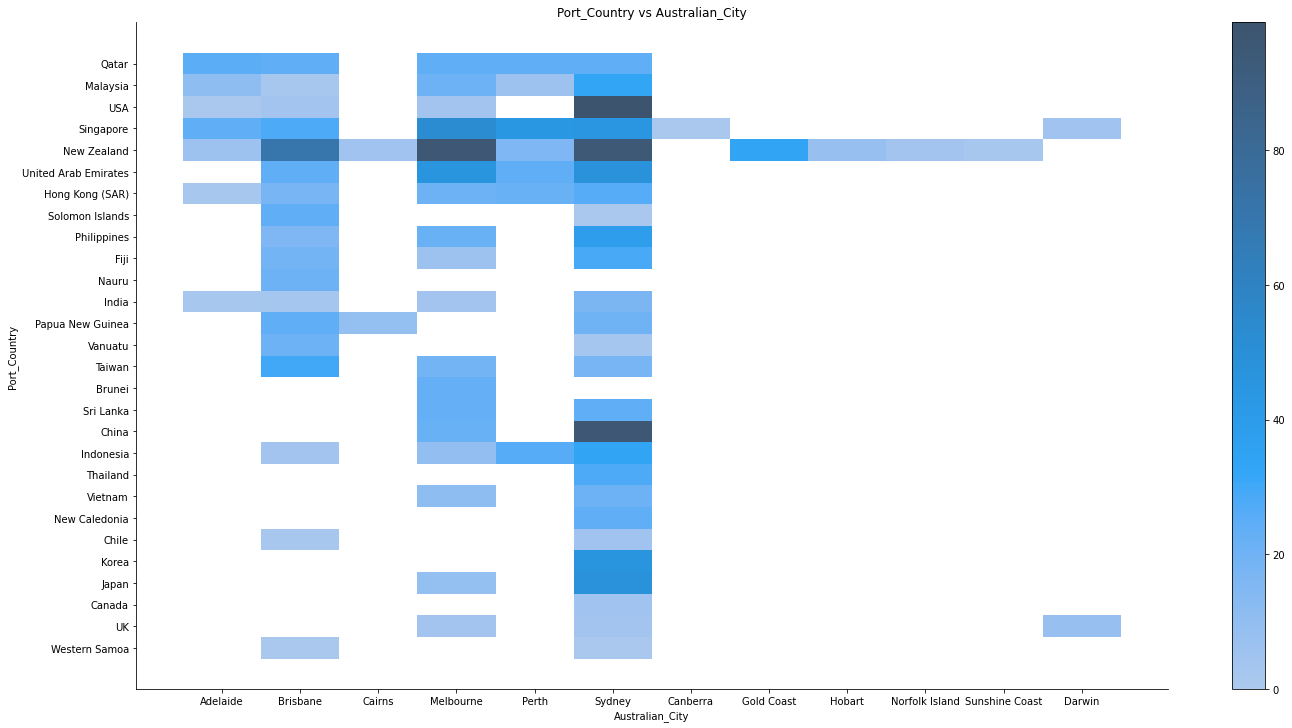

In [19]:
plot = sns.displot(df_1, y="Port_Country", x="Australian_City", cbar = True, height=10, aspect =2).set(title="Port_Country vs Australian_City")
plot.ax.tick_params(labelrotation = 0)

Observation: There is a high traffic between Sydney-China, Sydney-New Zealand & Sydney-USA. \
Sydney can be on of the airports with high air traffic.

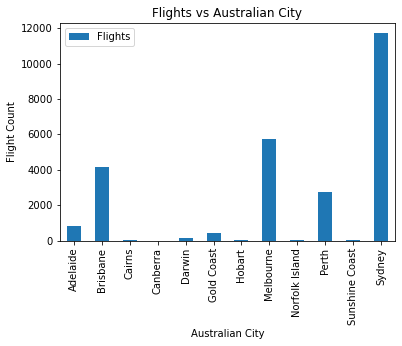

In [20]:
flights= df_1.groupby('Australian_City').agg(
    sum_flights = ('All_Flights','sum')
)
temp = pd.DataFrame({
    'Australian_City': flights.index,
    'Flights' : flights.sum_flights.values
})
temp.plot(x='Australian_City',kind='bar')
plt.xlabel("Australian City")
plt.ylabel("Flight Count")
plt.title("Flights vs Australian City")
plt.show()

Observation: Sydney has the most number of inbound/outbound flights in the year 2021 while Melbourne holds the second place with around 6000 flights

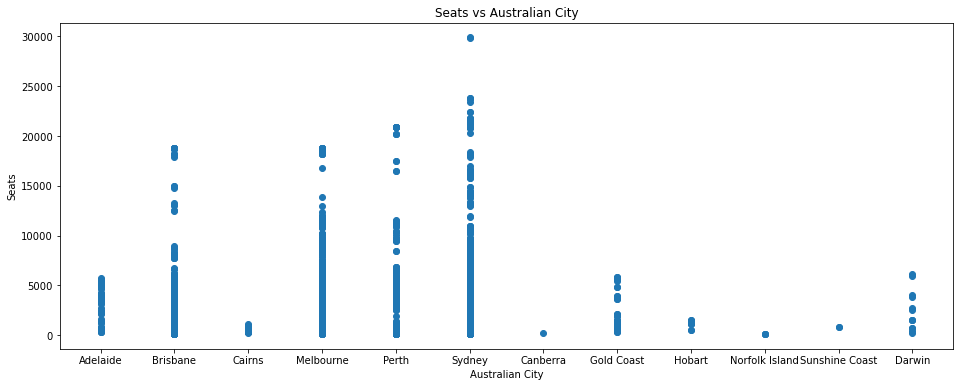

In [21]:
plt.figure(figsize=[16,6])
plt.scatter(data = df_1, y='Max_Seats', x='Australian_City')
plt.xlabel('Australian City')
plt.ylabel('Seats')
plt.title('Seats vs Australian City')
plt.show()

Observation: Most number of people are travelling abroad from Sydney, Perth and Melbourne

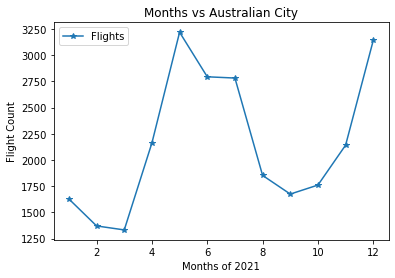

In [22]:
flights= df_1.groupby('Month_num').agg(
    sum_flights = ('All_Flights','sum')
)
temp = pd.DataFrame({
    'Month': flights.index,
    'Flights' : flights.sum_flights.values
})
temp.plot(x='Month', marker="*")
plt.xlabel("Months of 2021")
plt.ylabel("Flight Count")
plt.title("Months vs Australian City")
plt.show()

Observation: May has the highest count of flights while March has the least number.

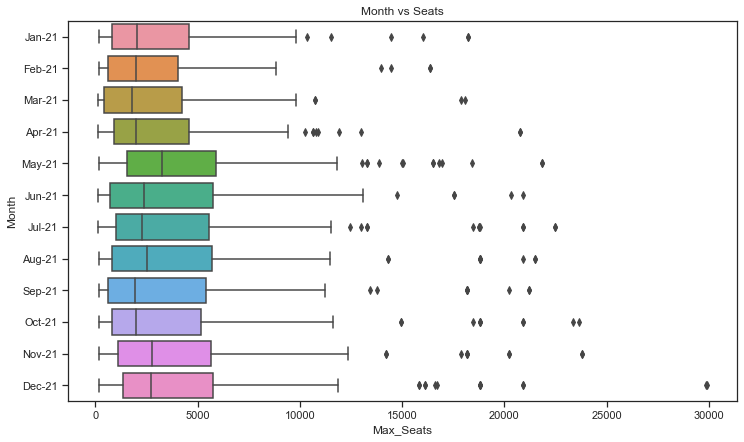

In [23]:
sns.set(rc={"figure.figsize":(12, 7)})
sns.set_style('ticks')
plot = sns.boxplot(y = 'Month', x = 'Max_Seats', data = df_1 ).set(title= 'Month vs Seats')

Observation: The mean of seats has increased in May, 2021 compared to the other months, and the least mean of seats in observed in the month of Septemeber, 2021.

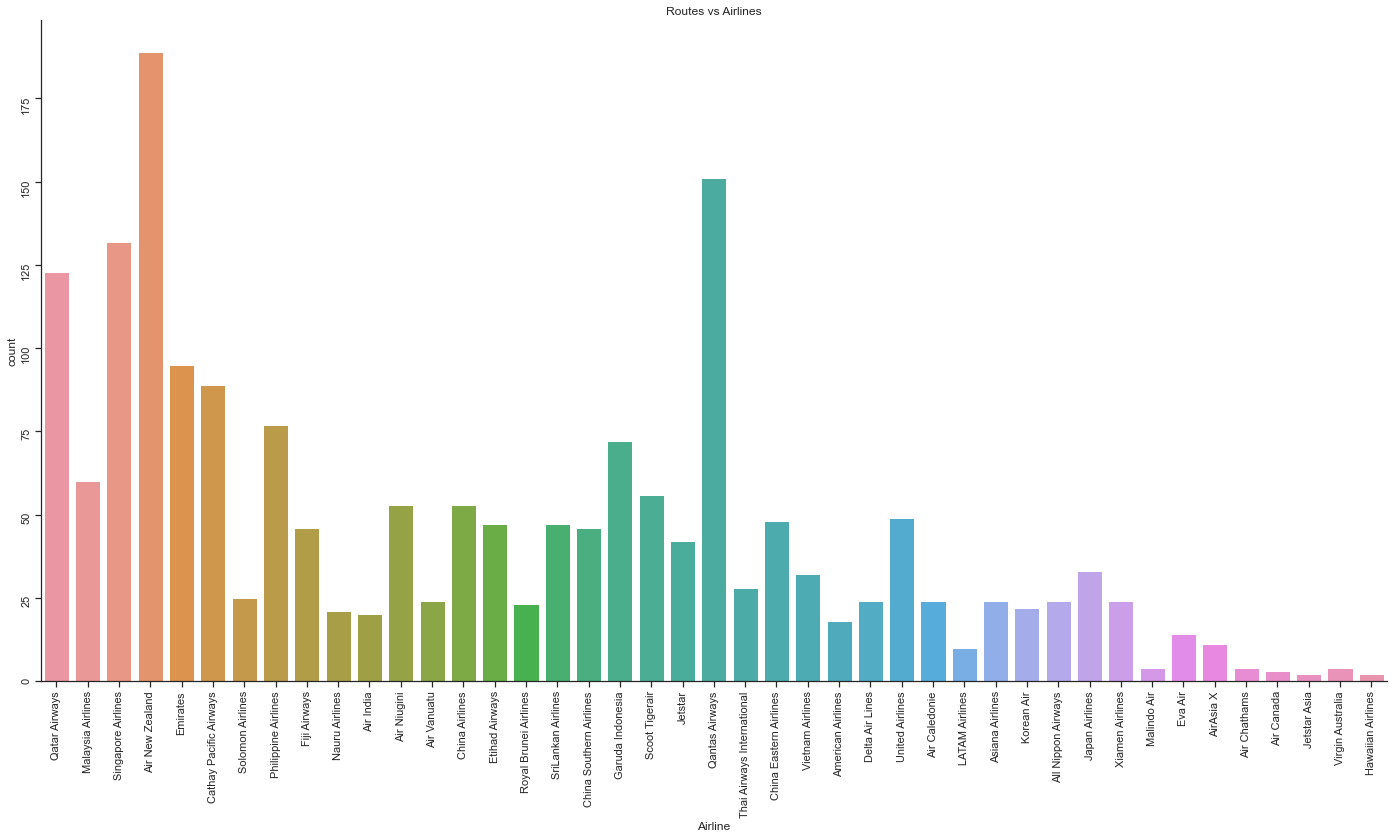

In [24]:
plot = sns.catplot(data= df_1, kind='count', x='Airline', height=10, aspect=2).set(title='Routes vs Airlines')
plot.ax.tick_params(labelrotation=90)

Observation: Air NewZealand is operating the more number of routes followed by Qantas Airways.

Takeaways from the project: \
Cleaning the data \
Performing various sanity checks \
Creating new DFs \
Understanding the right type of plots